t-SNE，全称为t-分布随机邻域嵌入（t-Distributed Stochastic Neighbor Embedding）， **是一种用于降维和数据可视化的技术。** t-SNE 特别适用于将高维数据映射到二维或三维空间，从而便于人们进行直观的观察和分析。

**目的**：t-SNE的目的是把高维数据（比如一个有100个特征的数据集）变成低维数据（通常是2维或3维），让我们可以通过图形的方式看到数据的结构和分布。

**核心思想**：它会尽量保持数据点之间的邻近关系。也就是说，原始数据集中彼此相近的数据点，在降维后的新空间中也会尽量靠近。

**工作原理**：

- 首先，它会计算原始高维空间中所有数据点之间的相似度，这里用的是一种概率测量方法。
- 然后，在低维空间中，通过迭代优化，使这些数据点的相似度尽量与高维空间中的相似度一致。

**结果**：最终的低维表示会使得原本相似的数据点仍然靠近，而不相似的点则远离开。这样，我们就可以通过二维或三维图来直观地观察数据的聚类、分布和异常点等信息。

## 理论基础

### 数学原理

1. **高维空间中的相似度计算**：
- 设原始数据集为 $ X = \{x_1, x_2, \ldots, x_N\} $，每个数据点 $ x_i $ 都是高维空间中的一个向量。
- 对于每对数据点 $ (x_i, x_j) $，计算高维空间中的相似度 $ p_{ij} $，这通常通过条件概率来表示：
$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
$$
这里， $ \sigma_i $ 是一个与数据点 $ x_i $ 相关的高斯分布的标准差。

- $ p_{ij} $ 的对称化处理：
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$$
这样处理后， $ p_{ij} $ 代表了在高维空间中数据点 $ x_i $ 和 $ x_j $ 的相似度。

2. **低维空间中的相似度计算**：
- t-SNE将高维数据映射到低维空间（通常是二维或三维），得到新的数据点 $ Y = \{y_1, y_2, \ldots, y_N\} $。
- 在低维空间中，使用t分布计算相似度 $ q_{ij} $：
$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$
这里，使用t分布而不是高斯分布，目的是为了更好地捕捉数据在低维空间中的局部结构。

3. **目标函数（损失函数）**：
- t-SNE的目标是最小化高维空间和低维空间中相似度的差异，使用KL散度（Kullback-Leibler Divergence）来衡量这种差异：
$$
C = KL(P \| Q) = \sum_{i} \sum_{j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$
这个目标函数越小，表示高维和低维空间中的相似度越接近。

### 算法流程

1. **输入**：高维数据集 $ X $，降维目标维度 $ d $（通常是2或3）。

2. **初始化**：在低维空间中随机初始化数据点 $ Y $。

3. **计算高维空间中的相似度**：
- 对于每对数据点 $ (x_i, x_j) $，计算条件概率 $ p_{j|i} $。
- 计算对称化后的相似度 $ p_{ij} $。

4. **迭代优化**：
- **计算低维空间中的相似度**：
$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$
- **计算梯度**：
$$
\frac{\partial C}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij}) (y_i - y_j) (1 + \|y_i - y_j\|^2)^{-1}
$$
- **更新低维空间中的数据点**：使用梯度下降法更新 $ y_i $，以最小化目标函数 $ C $。

5. **重复迭代**：不断重复步骤4，直到目标函数收敛或者达到预定的迭代次数。

6. **输出**：低维空间中的数据点 $ Y $。

t-SNE通过计算高维空间中数据点的相似度，并迭代优化低维空间中的数据点位置，使得低维空间中的相似度尽可能与高维空间中的相似度一致，从而实现高维数据的降维和可视化。

其**核心目标是让高维数据在低维空间中保持原有的结构和关系**。

Loading data...
Standardizing data...
Running t-SNE...
t-SNE done! Time elapsed: 204.99804663658142 seconds
Creating visualization...


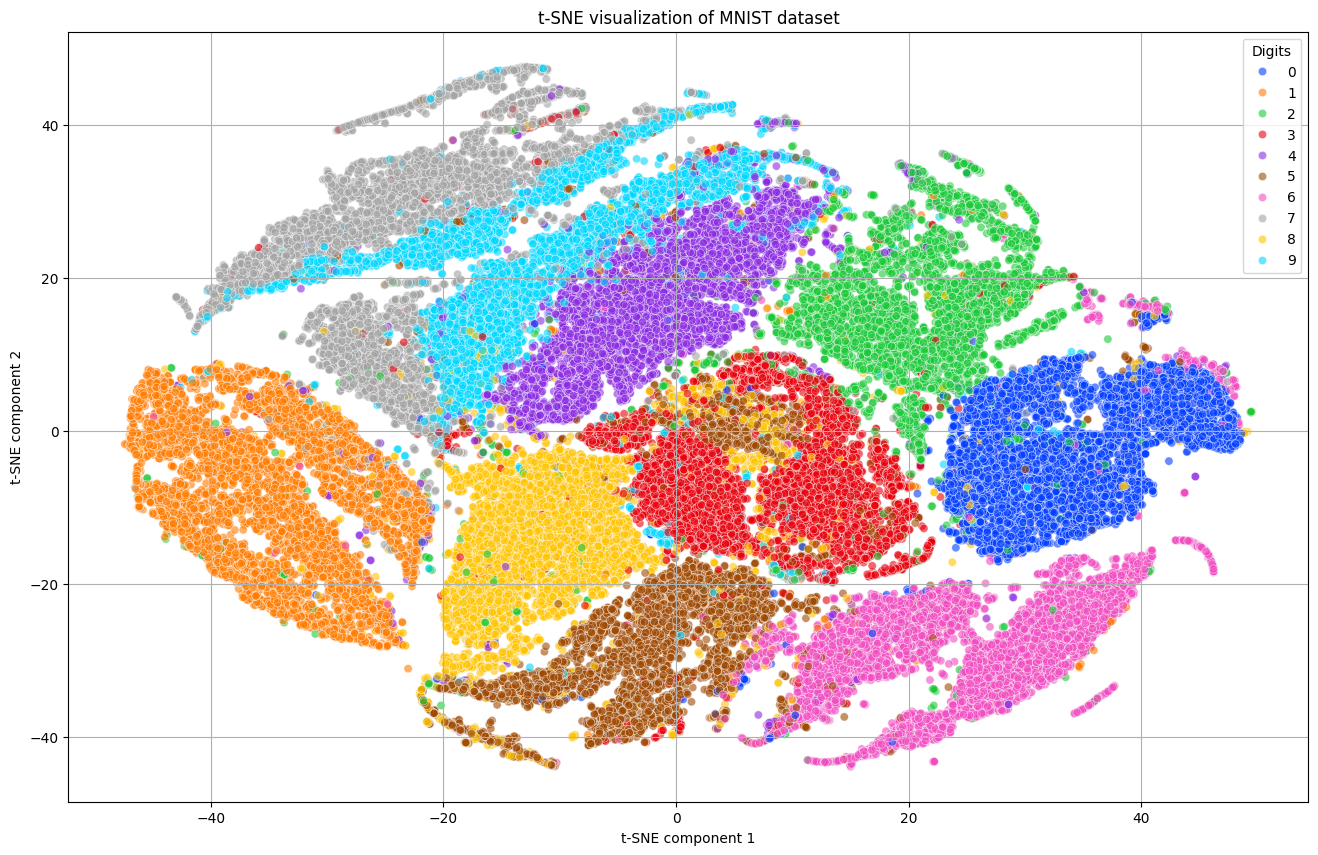

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from openTSNE import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 数据预处理
print("Loading data...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# 标准化数据
print("Standardizing data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 openTSNE 进行 t-SNE 降维
# 设定 t-SNE 参数
tsne_params = {
    "n_components": 2,
    "perplexity": 30,
    "early_exaggeration": 12.0,
    "learning_rate": 200,
    "n_iter": 1000,
    "n_jobs": -1,
    "random_state": 42
}

print("Running t-SNE...")
start_time = time.time()
tsne = TSNE(**tsne_params)
X_tsne = tsne.fit(X_scaled)
end_time = time.time()
print(f"t-SNE done! Time elapsed: {end_time - start_time} seconds")

# 可视化
print("Creating visualization...")
plt.figure(figsize=(16, 10))
palette = sns.color_palette("bright", 10)
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=y.astype(int),
    palette=palette,
    legend="full",
    alpha=0.6
)

plt.title("t-SNE visualization of MNIST dataset")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.legend(title="Digits", loc="best", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()